# Applying PCA technique on Wine quality data

Principal Component Analysis(Feature decomposition technique) is a dimensionality reduction technique. It converts the data i form of components and reduces the number of dimensions with minimal loss of data.

Data link: http://www3.dsi.uminho.pt/pcortez/wine/winequality.zip

In [1]:
#Importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('winequality-red.csv')

In [3]:
data

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
...,...
1594,6.2;0.6;0.08;2;0.09;32;44;0.9949;3.45;0.58;10.5;5
1595,5.9;0.55;0.1;2.2;0.062;39;51;0.99512;3.52;0.76...
1596,6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.7...
1597,5.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71...


In [4]:
#Spliting all values in seperate columns
data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']]=data['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(";",expand=True)

In [5]:
#Drop initial column and quality column
data.drop(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"','quality'], axis=1, inplace=True)

In [6]:
#This is how the current data looks like
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.6,0.08,2,0.09,32,44,0.9949,3.45,0.58,10.5
1595,5.9,0.55,0.1,2.2,0.062,39,51,0.99512,3.52,0.76,11.2
1596,6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11
1597,5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,10.2


In [7]:
#Checking for null values
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [8]:
#Checking column types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed acidity         1599 non-null   object
 1   volatile acidity      1599 non-null   object
 2   citric acid           1599 non-null   object
 3   residual sugar        1599 non-null   object
 4   chlorides             1599 non-null   object
 5   free sulfur dioxide   1599 non-null   object
 6   total sulfur dioxide  1599 non-null   object
 7   density               1599 non-null   object
 8   pH                    1599 non-null   object
 9   sulphates             1599 non-null   object
 10  alcohol               1599 non-null   object
dtypes: object(11)
memory usage: 137.5+ KB


In [9]:
#Since all the features are of object type we will convert it into numerical forms
cols = data.columns
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')

In [10]:
#The features are now in float format
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


<AxesSubplot: >

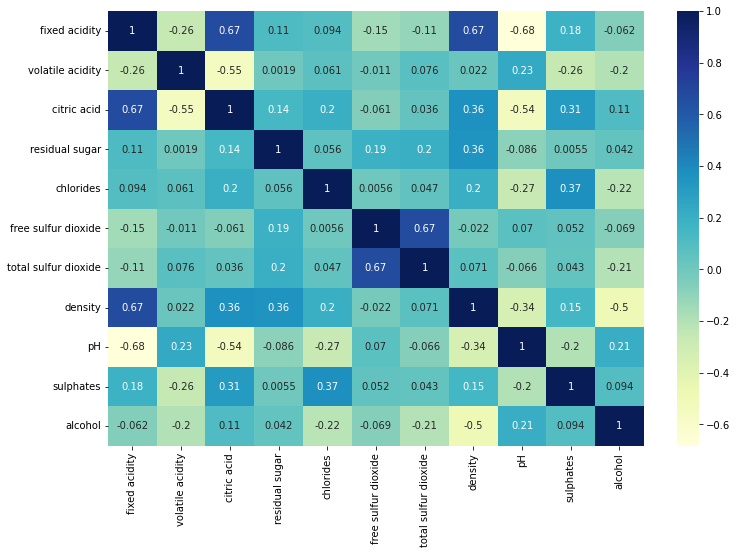

In [11]:
#Checking correlation using a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

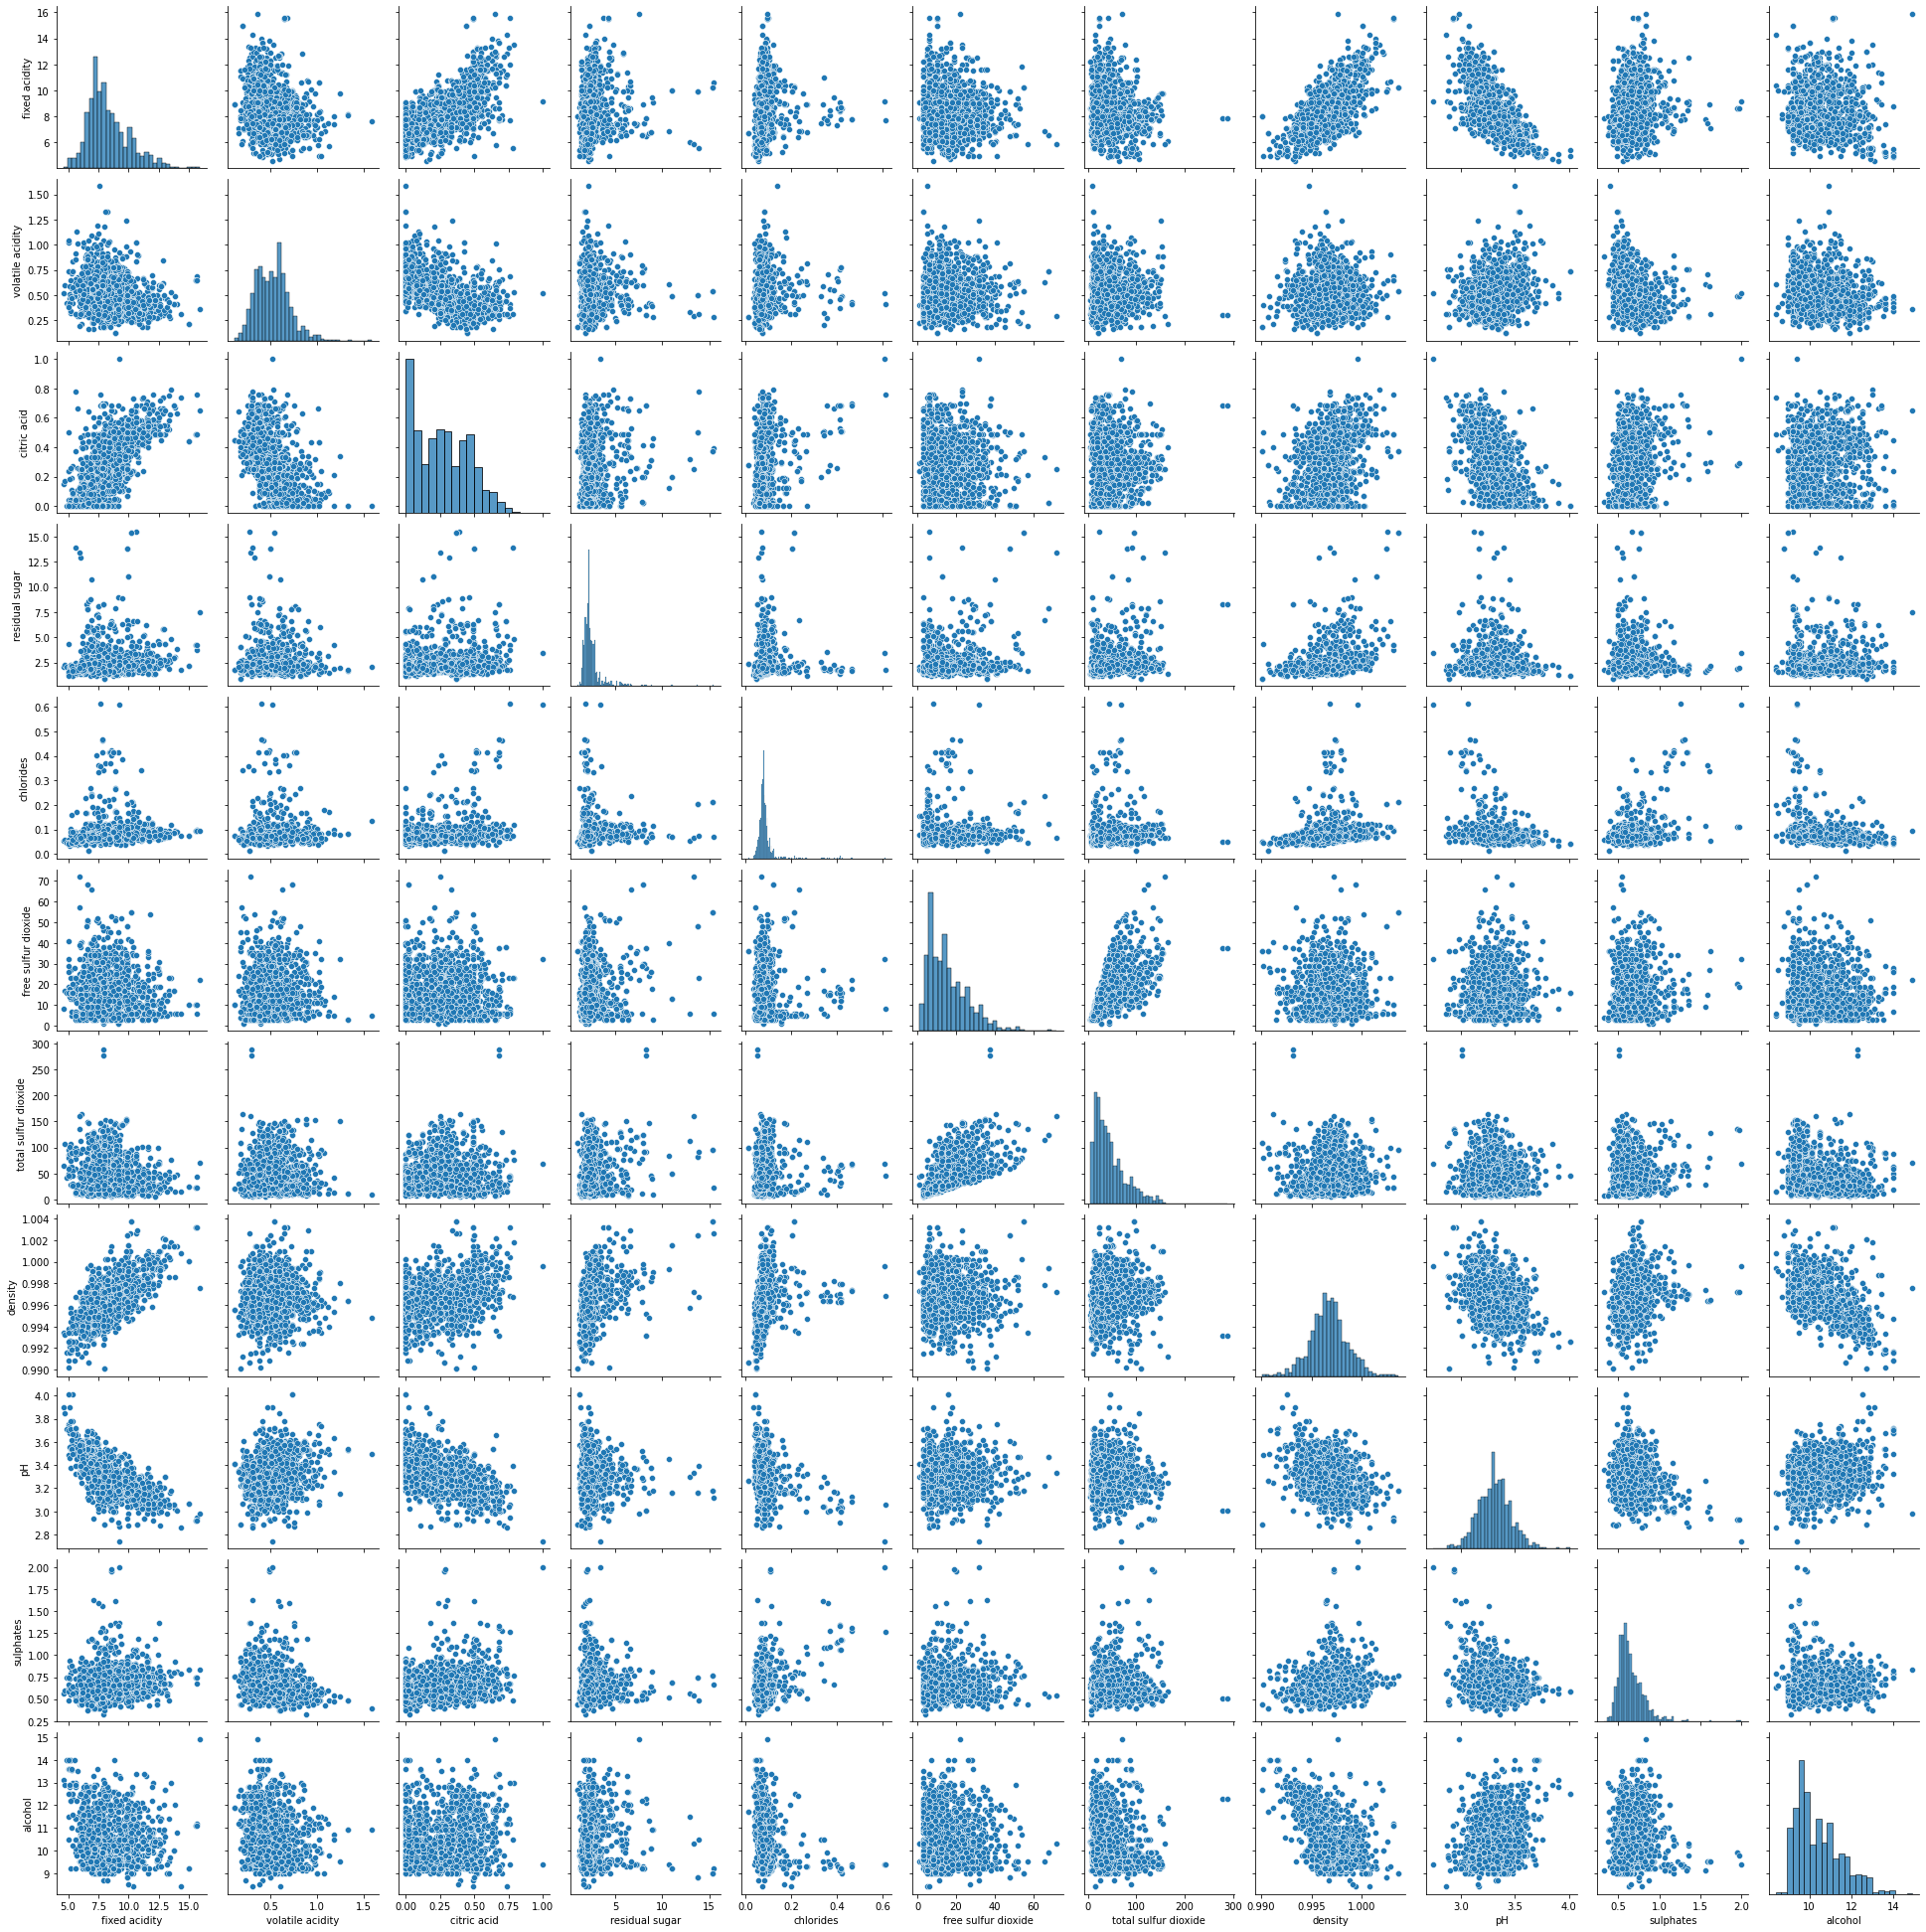

In [12]:
#Visualizing relations in data
sns.pairplot(data)

Since the features seem to be correlated, we will use PCA and try to derive same relations from less number of features

In [13]:
#Checking values of features
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [14]:
#Bringing all data into same scale by performing Standardization, as PCA is sensitive to variance in original data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

In [15]:
df=pd.DataFrame(data=scaled_data, columns= data.columns)

In [16]:
#Once data is normalised, PCA can be performed on it
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.435512e-16,1.699704e-16,4.335355e-16,-1.905223e-16,3.836136e-16,1.432042e-16,1.289532e-16,-3.482795e-14,3.002879e-15,7.639596e-16,9.437243e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00


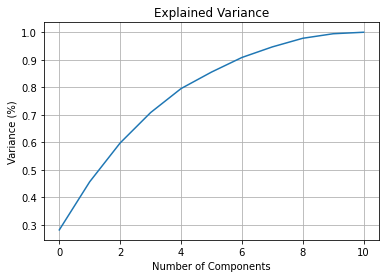

In [17]:
#Checking number of components that can show maximum relations from data
#Scree plot
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.grid()
plt.show()

In [18]:
#Creating 6 components as it can show around 90% of variance
pca = PCA(n_components=6)
new_data = pca.fit_transform(df)
# This will be the new data fed to the algorithm.
PCdata = pd.DataFrame(data = new_data, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6'])

In [19]:
PCdata

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921
...,...,...,...,...,...,...
1594,-2.150500,0.814286,0.617063,0.407687,-0.240936,0.054835
1595,-2.214496,0.893101,1.807402,0.414003,0.119592,-0.674711
1596,-1.456129,0.311746,1.124239,0.491877,0.193716,-0.506410
1597,-2.270518,0.979791,0.627965,0.639770,0.067735,-0.860408


PCdata can be used for giving input to algorithms instead of original data. 

It will reduce time and space complexity and will give similar result with less components
Large number of features can be confusing as model has to learn too much of data